# **Berita PageRank**

# Instalasi

In [1]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data

Data yang digunakan menggunakan hasil crawling data pada website Detik.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/PPWeb/tugas/berita_detik.csv')
df

,Unnamed: 0,Judul Berita,Isi Berita
0,0,Gibran Persilakan Bawaslu DKI Telusuri soal Ba...,"Jakarta - Cawapres nomor urut 2, Gibran Rakabu..."
1,1,"Kunker ke NTT, Jokowi Cek Gudang Bulog hingga ...",Jakarta - Presiden Joko Widodo (Jokowi) melaku...
2,2,DPRD DKI Minta Pemprov Segera Tuntaskan soal G...,Jakarta - Komisi A DPRD DKI Jakarta meminta Pe...
3,3,"Pakai Jersey Nomor 22, Jokowi Main Bola Bareng...",Manggarai Barat - Presiden Joko Widodo (Jokowi...
4,4,Massa 'Paman Usman' Geruduk Kantor PSI DIY Bun...,Puluhan massa yang mengatasnamakan diri Paguyu...
...,...,...,...
95,95,Leon Dozan Tak Otomatis Bebas Meski Aurora Pil...,Jakarta - Leon Dozan dan Rinoa Aurora dikabark...
96,96,BPTJ Prediksi Penumpang KRL Naik Usai Skybridg...,Bogor - Badan Pengelola Transportasi Jabodetab...
97,97,Israel Klaim Temukan 800 Lubang Terowongan Baw...,Gaza - Militer Israel mengklaim pasukannya te...
98,98,Motif Pembacokan hingga Tewas Siswa SMK di Bog...,Jakarta - Polisi menetapkan tiga pelajar sebag...


In [5]:
berita = df['Isi Berita'].iloc[4]
berita

"Puluhan massa yang mengatasnamakan diri Paguyuban Masyarakat Ngayogyakarta Untuk Sinambungan Keistimewaan atau 'Paman Usman' menggeruduk kantor DPW PSI DIY siang ini. Aksi ini imbas dari pernyataan politikus PSI Ade Armando soal politik dinasti."

# Preprocessing

Pada analisis kata kunci berita kali ini akan membutuhkan proses preprocessing untuk menghilangkan beberapa karakter yang tidak digunkanan dalam membuat kata kunci berita ini. Tahapan preprocessing ini antara lain yaitu menghapus angka, simbol dan stopword pada berita.

In [6]:
def preprocessing(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.lower()

    stop_words = set(stopwords.words('indonesian'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    preprocessing_text = ' '.join(filtered_words)

    return preprocessing_text

In [7]:
berita = preprocessing(berita)
print(berita)

puluhan massa mengatasnamakan paguyuban masyarakat ngayogyakarta sinambungan keistimewaan paman usman menggeruduk kantor dpw psi diy siang ini. aksi imbas pernyataan politikus psi ade armando politik dinasti.


# Membentuk Matriks

## Memisahkan Kalimat

In [8]:
kalimat = nltk.sent_tokenize(berita)
kalimat = [sentence.replace('.', '') for sentence in kalimat]
print(kalimat)

['puluhan massa mengatasnamakan paguyuban masyarakat ngayogyakarta sinambungan keistimewaan paman usman menggeruduk kantor dpw psi diy siang ini', 'aksi imbas pernyataan politikus psi ade armando politik dinasti']


## Memisahkan Kata

In [9]:
kata = word_tokenize(berita)
kata = [k.lower() for k in kata if k != '.']
kata = list(set(kata))
print(kata)

['imbas', 'puluhan', 'ade', 'dpw', 'aksi', 'masyarakat', 'keistimewaan', 'politikus', 'sinambungan', 'dinasti', 'mengatasnamakan', 'usman', 'menggeruduk', 'psi', 'siang', 'paman', 'massa', 'diy', 'ini', 'politik', 'pernyataan', 'paguyuban', 'armando', 'kantor', 'ngayogyakarta']


## Matriks Kata dalam Berita

In [10]:
matrikskata = pd.DataFrame(0, index=kata, columns=kata)

In [11]:
for sent in kalimat:
    kata_kalimat = word_tokenize(sent)
    for i in range(len(kata_kalimat)-1):
        matrikskata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1 # jika kata pada sebelah kanan
        matrikskata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1 # jika kata pada sebelah kiri

In [12]:
matrikskata

,imbas,puluhan,ade,dpw,aksi,masyarakat,keistimewaan,politikus,sinambungan,dinasti,...,paman,massa,diy,ini,politik,pernyataan,paguyuban,armando,kantor,ngayogyakarta
imbas,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
puluhan,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
dpw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
aksi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
masyarakat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
keistimewaan,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
politikus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
sinambungan,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
dinasti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Membentuk Graph

## Cosine Similarity
*Cosine similarity* digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Hasil dari *cosine similarity* ini akan menentukan apakah vektor tersebut menuju ke arah yang sama. Semakin kecil sudut antara dua vektor, maka semakin mirip satu sama lain sedangkan begitu juga sebaliknya, semakin besar nilai *cosine similarity* maka vektor tersebut dianggap jauh kemiripannya. Dalam ringkasan dokumen ini penting untuk menghitung nilai *cosine similarity* untuk mengetahui hubungan kesamaan antara kalimat satu dengan kalimat lainnya. Vektor yang digunakan untuk menghitung nilai *cosine simmilarity* ini adalah hasil dari TF-IDF pada langkah sebelumnya. Berikut merupakan rumus yang digunakan untuk menghitung nilai *cosine simmilarity*.<br><br>
$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$ <br><br>

Keterangan      = <br>
A.B             = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{k}y_{k}$ <br>
|A|             = Panjang vektor A dihitung dengan  $\sum_{i=1}^n x_{k}^2$ <br>
|B|             = Panjang vektor A dihitung dengan  $\sum_{i=1}^n y_{k}^2$ <br>


In [13]:
cosine = cosine_similarity(matrikskata, matrikskata)

In [14]:
similarity = pd.DataFrame(cosine, columns=matrikskata.index, index=matrikskata.index)
similarity

,imbas,puluhan,ade,dpw,aksi,masyarakat,keistimewaan,politikus,sinambungan,dinasti,...,paman,massa,diy,ini,politik,pernyataan,paguyuban,armando,kantor,ngayogyakarta
imbas,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.5,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
puluhan,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
ade,0.0,0.000000,1.0,0.5,0.000000,0.0,0.0,0.5,0.0,0.000000,...,0.0,0.0,0.500000,0.000000,0.5,0.000000,0.0,0.000000,0.000000,0.0
dpw,0.0,0.000000,0.5,1.0,0.000000,0.0,0.0,0.5,0.0,0.000000,...,0.0,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
aksi,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.000000,0.000000,0.0
masyarakat,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.5,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
keistimewaan,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.5
politikus,0.5,0.000000,0.5,0.5,0.000000,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
sinambungan,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,1.0,0.000000,...,0.5,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
dinasti,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.707107,0.000000,0.0


## Graph
Hasil dari nilai *cosine simmilarity* ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas (*treshold*) yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis *(edge)*. Nilai ambang batas (*treshold*) yang digunakan akan mempengaruhi graph yang digambarkan

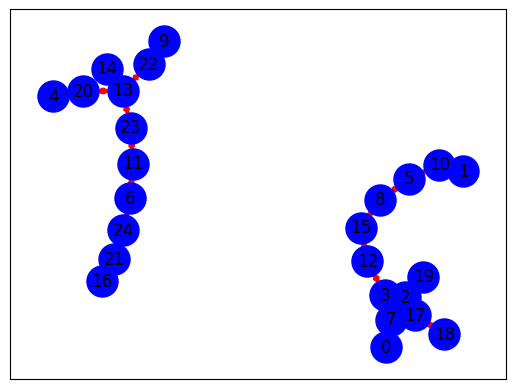

In [15]:
G = nx.DiGraph()
for i in range(len(cosine)):
    G.add_node(i)

for i in range(len(cosine)):
    for j in range(len(cosine)):
        similarity = cosine[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Hasil Kata Kunci

## Page Rank

Dalam konteks ini, dokumen dianggap sebagai "halaman" yang terhubung oleh hubungan yang merefleksikan keterkaitan atau relevansinya. Dengan menerapkan konsep PageRank, dokumen yang dianggap lebih "penting" atau relevan dapat diberikan skor lebih tinggi. Penggunaan faktor damping, serupa dengan dalam algoritma PageRank, dapat membantu mengontrol sejauh mana pengaruh satu dokumen terhadap yang lain. Dengan memberikan skor pada dokumen berdasarkan hubungan mereka dalam jaringan informasi, kita dapat menghasilkan ringkasan yang mencerminkan tingkat relevansi dan pentingnya masing-masing dokumen dalam konteks keseluruhan. <br><br>
$$S(V_{i}) = (1-d)+d * \sum\frac{1}{Out(V_{j})}S(V_{j})$$ <br><br>

Keterangan = <br>
d = faktor redaman, jika tidak ada sambungan keluar <br>
in(Vi) = tautan masuk dari i, yang merupakan satu set <br>
out(Vj) = tautan keluar dari j, yang merupakan satu set <br>
|out(Vj)| = jumlah tautan keluar

In [16]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 13: 0.0803
Node 2: 0.0598
Node 7: 0.0598
Node 17: 0.0598
Node 3: 0.0588
Node 21: 0.0463
Node 10: 0.0456
Node 20: 0.0441
Node 22: 0.0441
Node 24: 0.0435
Node 5: 0.0424
Node 6: 0.0419
Node 11: 0.0410
Node 23: 0.0405
Node 8: 0.0400
Node 15: 0.0377
Node 12: 0.0345
Node 16: 0.0257
Node 1: 0.0254
Node 4: 0.0247
Node 9: 0.0247
Node 14: 0.0231
Node 0: 0.0187
Node 18: 0.0187
Node 19: 0.0187


In [17]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")


Tiga Node Tertinggi Page Rank :
Node 13: Page Rank = 0.0803
Kalimat: psi
Node 2: Page Rank = 0.0598
Kalimat: ade
Node 7: Page Rank = 0.0598
Kalimat: politikus


## Kata Kunci Berita

In [18]:
news = df['Isi Berita'].iloc[4]
print('Berita yang digunakan : ')
news

Berita yang digunakan : 


"Puluhan massa yang mengatasnamakan diri Paguyuban Masyarakat Ngayogyakarta Untuk Sinambungan Keistimewaan atau 'Paman Usman' menggeruduk kantor DPW PSI DIY siang ini. Aksi ini imbas dari pernyataan politikus PSI Ade Armando soal politik dinasti."

In [19]:
print('Kata Kunci :', sentence)

Kata Kunci : psi, ade, politikus, 
